## Import tools

In [625]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from PIL import Image
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz 
from subprocess import call

## Get the data

In [626]:
img = Image.open(r"../pics/guess_who.jpg")
img.show()

In [627]:
# data = pd.read_csv("iris.csv", skiprows=1, header=None, names=col_names)
data = pd.read_csv("../csv/guess_who_dataset.csv", header=0)
data.head(10)

,Name,Bold,Hat,Glasses,Blue Eyes,Moustache,Beard,Brown Hair,Wide Nose,White Hair
0,Alex,0,0,0,0,1,0,1,0,0
1,Alfred,0,0,0,1,1,0,0,0,0
2,Anita,0,0,0,1,0,0,0,0,0
3,Anne,0,0,0,0,0,0,1,1,0
4,Bernard,0,1,0,0,0,0,1,1,0
5,Bill,1,0,0,0,0,1,0,0,0
6,Charles,0,0,0,0,1,0,0,0,0
7,Claire,0,1,1,0,0,0,0,0,0
8,David,0,0,0,0,0,1,0,0,0
9,Eric,0,1,0,0,0,0,0,0,0


In [628]:
colNames = ["Name", "Bold", "Hat", "Glasses", "Blue Eyes", "Moustache", "Beard", "Brown Hair", "Wide Nose", "White Hair"]
colNames

['Name',
 'Bold',
 'Hat',
 'Glasses',
 'Blue Eyes',
 'Moustache',
 'Beard',
 'Brown Hair',
 'Wide Nose',
 'White Hair']

## Feature Extraction

In [629]:
selectedFeatures = colNames[1:]
X = data[selectedFeatures]
classNames = data["Name"].to_list()
y = range(0, len(classNames))

## Fit the model

In [630]:
regressor = DecisionTreeRegressor(random_state = 2022, max_depth=10) 
regressor.fit(X, y)

DecisionTreeRegressor(max_depth=10, random_state=2022)

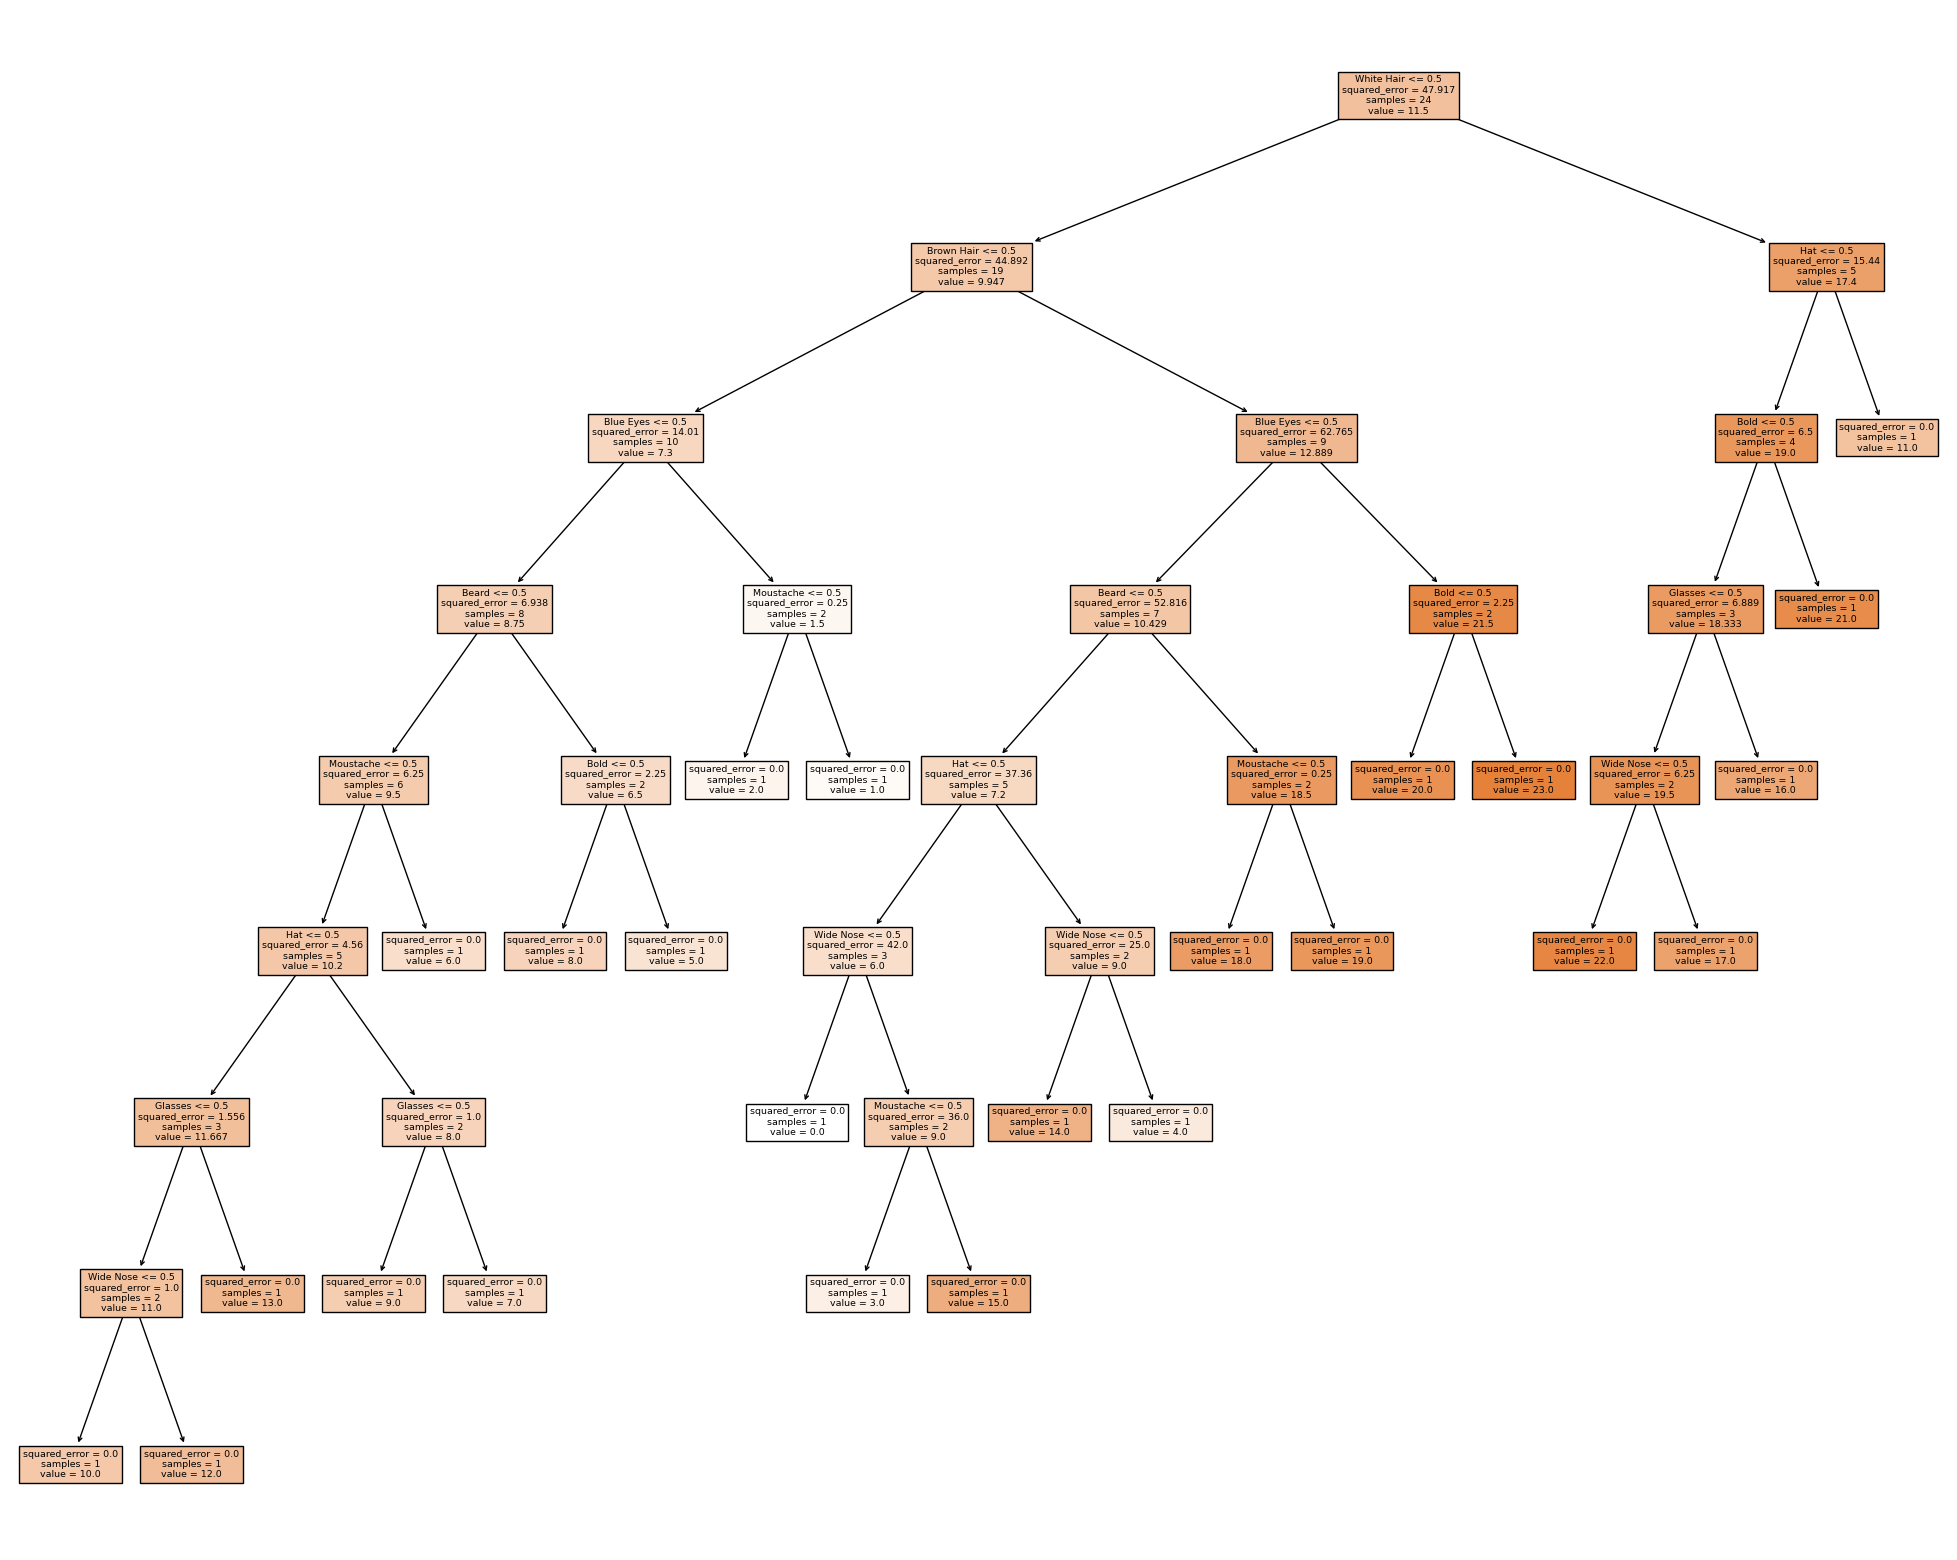

In [631]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor,
                   feature_names = selectedFeatures,
                   class_names = classNames,
                   filled=True)

## Visualize the model

In [632]:
classNames[0]
alex = X[selectedFeatures][0:1]
# print(type(alex))
# print(alex)
pred = round(regressor.predict(alex, selectedFeatures)[0])
print(classNames[pred])

Alex


In [633]:
# Export as dot file
dotFile = "../pics/tree.dot"
pngFile = "../pics/tree.png"

export_graphviz(regressor, out_file=dotFile, 
                feature_names = selectedFeatures,
                class_names = classNames,
                rounded = True, proportion = True, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
call(['dot', '-Tpng', dotFile, '-o', pngFile, '-Gdpi=500'])

img = Image.open(pngFile)
img.show()

## Test the model

In [634]:
classNames[0]
idx = classNames.index("Alex")
alex = X[selectedFeatures][idx:idx+1]
# print(type(alex))
# print(alex)
pred = round(regressor.predict(alex, selectedFeatures)[0])
print(classNames[pred])

Alex


In [635]:
idx = classNames.index("Bill")
bill = X[selectedFeatures][idx:idx+1]
pred = round(regressor.predict(bill, selectedFeatures)[0])
print(classNames[pred])

Bill
